# Lab 2: Comparing Means
## w203 Statistics for Data Science

## The Data

The American National Election Studies (ANES) conducts surveys of voters in the United States.  While its flagship survey occurs every four years at the time of each presidential election, ANES also conducts pilot studies midway between these elections.  You are provided with data from the 2018 ANES Pilot Study.

An important disclaimer is that the ANES Pilot Study does not represent a random sample of the U.S. population.  Participants are taken from the YouGov panel, which is an online system in which users earn rewards for completing questionnaires.  This feature limits the extent to which results generalize to the U.S. population.

To account for differences between the YouGov panel and the U.S. Population, ANES assigns a survey weight to each observation.  This weight estimates the degree to which a citizen with certain observed characteristics is over- or under-represented in the sample.  For the purposes of this assignment, however, you are not asked to use the survey weights.  Instead, you should view your analysis as pertaining to the population of YouGov participants.  (For groups with a strong interest in survey analysis, we recommend that you read about R's [survey package](http://r-survey.r-forge.r-project.org/survey/).  We will assign a very small number of bonus points (up to 3) to any group that correctly applies the survey weights and includes a clear explanation of how these work).

For a glimpse into some of the intricacies that go into the design of this study, take a look at the introduction to the [ANES User's Guide and Codebook](https://electionstudies.org/wp-content/uploads/2019/02/anes_pilot_2018_userguidecodebook.pdf).

In [1]:
A = read.csv("anes_pilot_2018.csv")

In [2]:
library(effsize)
library(dplyr)
library("ggplot2")


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Following is an example of a question asked on the ANES survey:

> How difficult was it for you to vote in this last election?

The variable `votehard` records answers to this question, with the following encoding:

- -1 inapplicable, legitimate skip
- 1 Not difficult at all
- 2 A little difficult
- 3 Moderately difficult
- 4 Very difficult
- 5 Extremely difficult


To see the precise form of each question, take a look at the [Questionnaire Specifications](https://electionstudies.org/wp-content/uploads/2018/12/anes_pilot_2018_questionnaire.pdf).

## Assignment

You will use the ANES dataset to address five research questions.  For each question, you will need to operationalize the concepts (selecting appropriate variables and possibly transforming them), conduct exploratory analysis, deal with non-response and other special codes, perform sanity checks, select an appropriate hypothesis test, conduct the test, and interpret your results.  When selecting a hypothesis test, you may choose from the tests covered in the async, including both paired and unpaired t-tests, as well as their nonparametric analogues.  You may select a one-tailed or two-tailed test. 

Please organize your response according to the prompts in this notebook.

Note that this is a group lab.  There is a **maximum of three students per team.** You are free to form a group of your choice amongst the students in your live section.
Although you may work on your own, we do not recommend this (we have found that individuals tend to do worse than teams on past labs).

Please limit your submission to 15 pages in total.  This means that you will have to carefully prioritize which visualizations to include.

**Hint:** When answering questions about the potential gaps between conceptual and operational definitions it is often helpful to ask yourself "If I could do anything I wanted, including borrowing Rick's portal gun, or doing an FMRI scan on all survey takers, to operationalize this particular concept how would I do it" and then explain how that is different than what is actually measured.   

## Submission Guidelines
- Submit _one_ report per group.
- Submit *both* your pdf report as well as your source file.
- **Only analyses and comments included in your PDF report will be considered for grading.**
- Include names of group members on the front page of the submitted report.
- Naming structure of submitted files:
    - PDF report: [student_surname_1]\_[student_surname_2][\_*]\_lab\_2.pdf
    - Jupyter Notebook: [student_surname_1]\_[student_surname_2][\_*]\_lab\_2.ipynb


# Research Questions

## Question 2: Are Republican voters older or younger than Democratic voters?

### Introduce your topic briefly.  (5 points)
Explain how your variables are operationalized.  Comment on any gaps that you can identify between your operational definitions and the concepts you are trying to study.

We would like to compare the average age of Republican voters against the average age of Democratic voters. In order to do so, we need to determine 1) the age of the voter and 2) the political affiliation of the voter. We attempt to operationalize our variables as follows:

*Age of Voter:*
An examination of the ANES questionnaire specification indicates that there is a field called 'birthyr' that corresponds to the question 'In what year were you born?' Given that this study was conducted in December 2018, we can calculate a new variable called age by subtracting 'birthyr' from 2018. 

* Given that the survey was completed before Dec 21, 2018, there is a slight possibility that certain values for "age" may be off by a year as the participant could have been born in the remaining 10 days of the year. However, this is should not be an important distinction. 
* We can sanity check this age variable in our EDA by looking at its range. We should expect that that the minimum age is 18 given that survey participants should be 18 or older.

*Party Affiliation:*
What does it mean to be a "Republican" or "Democrat" voter? Does it depend on a voter's previous voting record? Or perhaps on party registration? Or how they describe their own political affiliation? 

* Self-described political affiliation: We believe that the self-described political affiliation, in the fields pid1d or pid1r is the best variable to use to determine with which party the voter best identifies. These fields correspond with the survey question "Generally speaking, do you usually think of yourself as a Democrat, a Republican, an
independent, or what?" However, just because the voter identifies with one party (or neither) at the time the survey was conducted in 2018 does not mean that they have always identified with this choice. Also, as political parties (and what they stand for) evolve over time, we must be careful when extrapolating this classification across time periods. We may also miss voters who declare themselves as others, but still feel like they are either "More democrat " or "more Repbulican". Nonetheless for the avoidance of doubt, a "Republican" voter in our study will be defined as someone who identified as "Generally speaking, thinking of themselves as a Republican in December 2018," and likewise for a Democrat voter. 

We also examined other ways to determine the political affiliation of a voter, but found them to be more ambigious and less optimal operationalizations of our variables. 

* Voting record: Entries such as 'vote16' which corresponds to the voter's choice in the 2016 presidential election, or other fields related to the 2018 elections could give us insight into each voter's record. However, just because a voter voted for a democratic candidate in 2016 or 2018 does not provide enough data points to determine them as a "democrat" voter, and we may run into difficult judgement calls if the voter voted for different parties in the two years. 

* Voter registration: The field 'vote20dem' offers us insight into whether a voter planned to participate in the 2020 democratic primaries. Primaries in the US are only open to registered voters of that party. This would give us insight into which voters have registered as Democrats, but would not give us insights into those who did not (if they are Republican, indpendent or something else).

### Perform an exploratory data analysis (EDA) of the relevant variables. (5 points)
This should include a treatment of non-response and other special codes, basic sanity checks, and a justification for any values that are removed.  Use visual tools to assess the relationship among your variables and comment on any features you find.

**Age**
* As defined above, we compute age by subtracting birthyr from 2018.
* We note from the summary and histogram below that the range of all ages are from 18 - 91 years old, with the mean age of all survey participants as 49.5 years.
* We note that most respondents are between 20-70 years, with fewer >80. This makes sense as overall in the US population there should be less people alive and computer literate >80.

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  18.00   35.00   52.00   49.48   62.00   91.00 

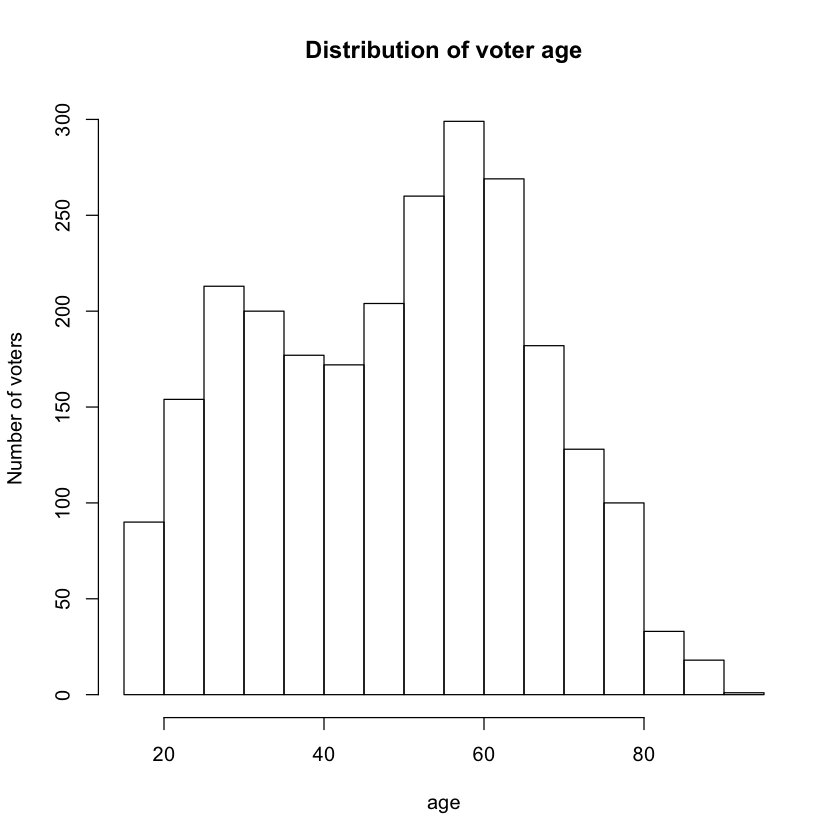

In [3]:
age<- 2018-A$birthyr
summary(age)
hist(age, main="Distribution of voter age", ylab="Number of voters")

**Political Affiliation**
* Since this question had two formats, which ranked either "Democrat" or "Republican" first, we need to look at book fields "pid1d" and "pid1r". 
* We note that these fields should only contain the numbers (1-4), -1 for inapplicable and -7 for no answer. If a -4 appears, it means an error occured in the survey process. Our EDA below shows that the unique values in these fields are indeed -7,-1,[1-4]
* Participants should have only been shown either "pid1d" or "pid1r". As a result, if they record a result of 1-4 or -7 for one entry, they should shown -1 in the other field. We confirm this below. 

In [4]:
# Check for appopriate values.
unique(A$pid1d)
unique(A$pid1r)

[1]  2 -1  3  1  4 -7

[1] -1  2  3  1  4 -7

In [5]:
#Check that only 1 of pid1d/pid1r is filled by replacing -1 with 0 in both vectors.
check_1d<-replace(A$pid1d,A$pid1d==-1,0)
check_1r<-replace(A$pid1r,A$pid1r==-1,0)
# The product of the two vectors should be 0 for every entry.
check<-check_1d*check_1r
# Check that all values are 0.
summary(check)
length(check)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0       0       0       0       0       0 

[1] 2500

In [6]:
#Extract all the rows from A$pid1d that equal 1 (democrat) or 2 (republican)
# Extract relevant columns from A.
df_1d<-select(A,birthyr,pid1d)
# Add an age column.
df_1d$age<-2018-A$birthyr
# Replace 1 and 2 with democrat and republican, respectively.
df_1d$pid1d<-replace(df_1d$pid1d,A$pid1d==1,"democrat")
df_1d$pid1d<-replace(df_1d$pid1d,A$pid1d==2,"republican")
# Filter out all other values.
df_1d<-df_1d %>% filter(pid1d == "democrat" | pid1d=="republican")
#Rename pid1d to party.
df_1d<-rename(df_1d, party = pid1d)
# Drop birth year column.
df_1d<-select(df_1d, age,party)

In [7]:
head(df_1d)
length(df_1d$age)

age,party
32,republican
61,democrat
50,democrat
31,republican
66,democrat
38,democrat


[1] 758

In [8]:
#Extract all the rows from A$pid1r that equal 1 (republican) or 2 (democrat)
# Extract relevant columbns from A.
df_1r<-select(A,birthyr,pid1r)
# Add an age column.
df_1r$age<-2018-A$birthyr
# Replace 1 and 2 with democrat and republican, respectively.
df_1r$pid1r<-replace(df_1r$pid1r,A$pid1r==1,"republican")
df_1r$pid1r<-replace(df_1r$pid1r,A$pid1r==2,"democrat")
# Filter out all other values.
df_1r<-df_1r %>% filter(pid1r == "democrat" | pid1r=="republican")
#Rename pid1r to party.
df_1r<-rename(df_1r, party = pid1r)
# Drop birth year column.
df_1r<-select(df_1r, age,party)

In [9]:
head(df_1r)
length(df_1r$age)

age,party
46,democrat
29,democrat
26,republican
56,democrat
40,democrat
67,democrat


[1] 708

In [10]:
# Combine both tables
age_df<-rbind(df_1d,df_1r)
head(age_df)
length(age_df$age)

age,party
32,republican
61,democrat
50,democrat
31,republican
66,democrat
38,democrat


[1] 1466

In [11]:
rep<-filter(age_df,party=="republican")
dem<-filter(age_df,party=="democrat")
length(rep$party)
length(dem$party)

[1] 751

[1] 715

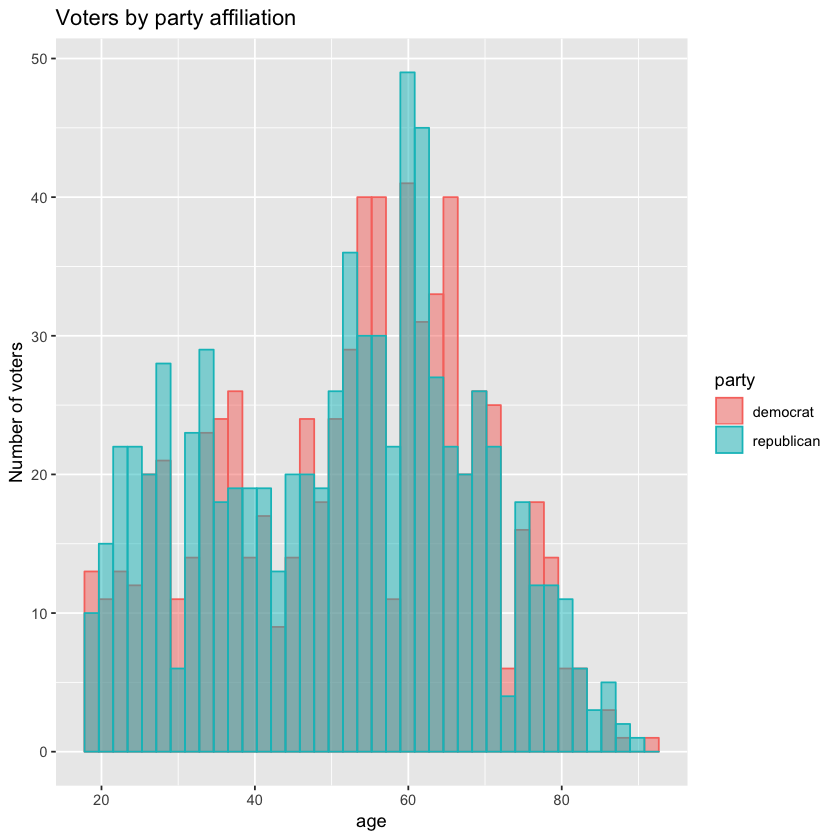

In [12]:
# Create a histogram.
ggplot(age_df, aes(x=age, color=party, fill=party)) +
  geom_histogram(position="identity", alpha=0.5, bins =40) + ggtitle("Voters by party affiliation")+ylab("Number of voters")

### Based on your EDA, select an appropriate hypothesis test.  (5 points)
Explain why your test is the most appropriate choice, focusing on its statistical assumptions.

We will use an Independent Two Sample T-Test to determine if there is a statistically significant difference between the means in two unrelated groups. 
* Our null hypothesis is $H_0: \mu_{republican} = \mu_{democrat}$ 
, There are no difference between the mean age of democrat and republican voters. 
* The alternative hypothesis is $H_A: \mu_{republican} \neq \mu_{democrat}$ , The mean age of repbulican voters are greater or less than the mean of democrat voters. 

We believe an indpendent T-test is the most appropriate choice because:

* There are two categorical groups for our independent variable and the groups are different people.
* Based on the histogram above, the dependent variable (age) is continuous. 
* Both groups appear to be fairly normally distributed from the histogram above and the sample size for both are over 700.
* The draws for both groups should be fairly independently and identically distributed given the YouGov sample methodology. It is not possible for a respondent to be in both groups.
* From our EDA, it is fair to assume homogeneity of variances.

### Conduct your test. (5 points)
Explain (1) the statistical significance of your result, and (2) the practical significance of your result.  Make sure you relate your findings to the original research question.

In [13]:
t.test(age ~ party, data=age_df)


	Welch Two Sample t-test

data:  age by party
t = 1.2993, df = 1463.4, p-value = 0.1941
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.5835786  2.8731319
sample estimates:
  mean in group democrat mean in group republican 
                51.90909                 50.76431 


In [14]:
cohen.d(age~party, data=age_df)


Cohen's d

d estimate: 0.06783931 (negligible)
95 percent confidence interval:
      lower       upper 
-0.03468482  0.17036344 

**Q2 Summary of Results:**

Our paired T-test returned a p-value of 0.1941, which is greater than 0.05. As a result, our test is not statistically significant and we failed to reject the null hypothesis that there is no difference between the mean age of democrat voters and republican voters. 

We also note from the t-test that the positive t-value indicates that the sample mean of the first group was higher than the sample mean of the second group (which we note to be true as the sample mean of the democrat group was 51.9 compared to 50.8 of the republican group). The 1463.4 degrees of freedom indicates that the sample variances between the two groups were not equal. Also, typically if the 95% CI includes 0, the results are not statistically significant, which is reflected in the p-value.

Practically, using the Cohen's d method we got a d estimate of 0.068, which is less than 0.2. As a result, the practical significance of our test is small. 

Thus, while the mean age of Republican voters was different from the mean age of Democrat voters in our survey population, we can not conclude that the Republican voters are older or younger than Democrat voters. It is only through a very careful study can we see the effect of age on one's self-professed party affiliation, if there is an effect at all. 

## Question 3: Do a majority of independent voters believe that the federal investigations of Russian election interference are baseless?

### Introduce your topic briefly.  (5 points)
Explain how your variables are operationalized.  Comment on any gaps that you can identify between your operational definitions and the concepts you are trying to study.

We would like to determine if a majority of independent voters believes the Russian election inteference are baselss . In order to do so, we need to determine 1) which voters identify as independent and 2) whether they believe that the investigations are baseless. We attempt to operationalize our variables as follows:

*Affiliation as independent:*
Similar to Question 2 above, we believe that the self-described political affiliation, in the fields 'pid1d' or 'pid1r' is the best variable to use to determine which voters identify as indpendents. The limitations of using this field are noted in Q2.

*Majority:*
We define majority as a simple majority, i.e. >50% # of independent voters.

*Belief that federal investigations of Russian election inteference are baseless*
The federal investigations into Russian election interference can be grouped into two buckets of investigations that were separately pursued by the US House of Representatives, Senate and Department of Justice: 1) Whether or not the Russians interfered in the 2016 presidential election, and 2) Whether there were links ir coordination between Donald Trump's campaign and the Russian government. 

For the purpose of our investigation, we limit our examination of "federal investigations" to the first bucket. As a result, we are interested in the variable 'russia16' which corresponds to the question 'Do you think the Russian government probably interfered in the 2016 presidential election to try to help Donald Trump win, or do you think this probably did not happen? ' The answers for russia16 are either (1) for "Russia probably interfered" and (2) for "This probably did not happen." We will also operationalize this by changing the first response to 0 and the second to 1. 

* One limitation of this operationalization is that while voters may hold the view that the Russians inteference probably did not occur, it does not necessarily mean that they think the investigation is baseless. They could in fact hold that the opinion that an investigation is necessary to confirm the Russians did not intefere. 


### Perform an exploratory data analysis (EDA) of the relevant variables. (5 points)
This should include a treatment of non-response and other special codes, basic sanity checks, and a justification for any values that are removed.  Use visual tools to assess the relationship among your variables and comment on any features you find.

**Independent Political Affiliation**
* We have already checked the pid1d and pid1r fields in Q2.
* From the EDA below, we can see that there are 767 respondents that identified as independent.

**Russian Election Inteference**
* We should expect to see only answers 1,2,-7 for 'russia16' before our transformation. Again -7 indicates no answer.
* When we filter for only independent voters, we see from below that there are no '-7' responses, which means we do not have to remove or deal with these responses.  

In [15]:
# Validate values for Russia16
unique(A$russia16)

[1]  2  1 -7

In [16]:
#Extract all the rows from A$pid1d that equal 3 (independent)
# Extract relevant columbns from A.
df_ind1<-select(A,russia16,pid1d)
# Replace 3 with independent.
df_ind1$pid1d<-replace(df_ind1$pid1d,A$pid1d==3,"independent")
# Filter out all other values.
df_ind1<-df_ind1 %>% filter(pid1d == "independent")
#Rename pid1d to party.
df_ind1<-rename(df_ind1, party = pid1d)
# Drop birth year column.
df_ind1<-select(df_ind1, russia16,party)
head(df_ind1)

russia16,party
2,independent
2,independent
1,independent
1,independent
1,independent
1,independent


In [17]:
# Repeat for A$pid1r that equals 3(independent)
# Extract relevant columbns from A.
df_ind2<-select(A,russia16,pid1r)
# Replace 3 with independent.
df_ind2$pid1r<-replace(df_ind2$pid1r,A$pid1r==3,"independent")
# Filter out all other values.
df_ind2<-df_ind2 %>% filter(pid1r == "independent")
#Rename pid1r to party.
df_ind2<-rename(df_ind2, party = pid1r)
# Drop birth year column.
df_ind2<-select(df_ind2, russia16,party)
head(df_ind2)

russia16,party
1,independent
1,independent
2,independent
1,independent
1,independent
2,independent


In [18]:
# Combine both tables
ind_rus_df<-rbind(df_ind1,df_ind2) 
# Adjust russia 16 to 0 for "Russia probably interfered" and 1 for "This probably did not happen.".
ind_rus_df$russia16<-replace(ind_rus_df$russia16, ind_rus_df$russia16==1,0)
ind_rus_df$russia16<-replace(ind_rus_df$russia16, ind_rus_df$russia16==2,1)
head(ind_rus_df)
print("Number of voters")
length(ind_rus_df$russia16)
print("Russia16 Unique values:")
unique(ind_rus_df$russia16)

russia16,party
1,independent
1,independent
0,independent
0,independent
0,independent
0,independent


[1] "Number of voters"


[1] 767

[1] "Russia16 Unique values:"


[1] 1 0

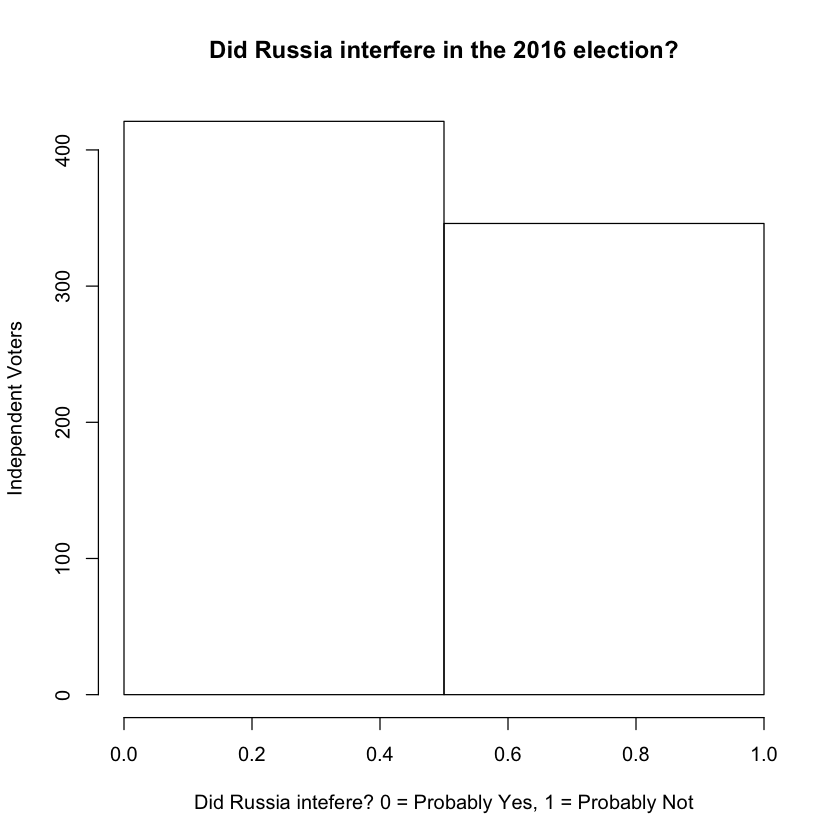

In [19]:
hist(ind_rus_df$russia16, breaks = 2, main = "Did Russia interfere in the 2016 election?", xlab="Did Russia intefere? 0 = Probably Yes, 1 = Probably Not", ylab="Independent Voters")

### Based on your EDA, select an appropriate hypothesis test.  (5 points)
Explain why your test is the most appropriate choice, focusing on its statistical assumptions.

We will use a two tailed, one sample T-Test to determine if the majority of independent voters feel that the federal investigations into Russian election inteference are baseless.   
* Our null hypothesis is $H_0: \mu = 0.5$ 
* The alternative hypothesis is $H_A: \mu \neq 0.5$.

We believe an two-sided, one sample T-test is the most appropriate choice because:

* We have a large sample size (767) entries and believe that the Central Limit Theorem should hold, so the distribution should resemble a semi-normal distribution.
* The draws should be fairly independently and identically distributed given the YouGov sample methodology. It is not possible for a respondent to be in both groups.
* Since the true mean can be greater, equal or less than 0.5, a two-tailed test is more appropriate than a one-tailed t-test. 

However, since a two-sided t-test will not tell us if the true mean is >0.5, we will also construct a 95% confidence interval and examine the t-statistic to determine if the true mean is less than or greater than 0.5 in the case that the null hypothesis is rejected. 

### Conduct your test. (5 points)
Explain (1) the statistical significance of your result, and (2) the practical significance of your result.  Make sure you relate your findings to the original research question.

In [20]:
t.test(ind_rus_df$russia16, mu=0.5)


	One Sample t-test

data:  ind_rus_df$russia16
t = -2.7194, df = 766, p-value = 0.006689
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4158139 0.4864025
sample estimates:
mean of x 
0.4511082 


In [21]:
# Practical effect size using Cohen's d estimate:
(0.5-mean(ind_rus_df$russia16))/sd(ind_rus_df$russia16)

[1] 0.09819036

**Q3 Summary of Results:**

Our one sample T-test returned a p-value of 0.007, which is much greater than 0.05. As a result, our test is statistically significant and we can reject the null hypothesis that the true mean is less than or equal to 0.5. Since our 95% CI is (0.415,0.486) and we have a negative t statistic with 766 degrees of freedom, we can reasonably conclude that the true mean is less than 0.5 since 95% of intervals constructed in this manner should contain the true mean. 

Practically, using the Cohen's d method we got a d estimate of 0.09, which is less than 0.2. As a result, the practical significance of our test is small. 

Given that we operationalized the belief that federal investigations of Russian election inteference are baseless based on whether or not respondents believed that the Russia intefered with the election, we determined that the majority of independent voters believe Russia probably did intervene and we extrapolate that to imply that they belief that the federal investigations have merit. However, this finding should be taken with a grain of salt as the practical significance is small. 

## Question 5: Are voters who identify as neither Republican or Democratic, more worried about not being able to make ends meet or not having access to healthcare?

### Clearly argue for the relevance of this question.  (10 points)
In words, clearly state your research question and argue why it is important for understanding the recent voting behavior. Explain it as if you were presenting to an audience that includes technical and non technical members.

Explain how your variables are operationalized.  Comment on any gaps that you can identify between your operational definitions and the concepts you are trying to study.

The United States has a winner-take-all voting system in which the candidates with the largest number of votes is awarded the political position. As a result, candidates must often try to gather votes from outside their core supporters, including votes from independents or voters who subscribe to different political beliefs. In order to 1) appeal to a broader audience and 2) to guide policy following election into office, potential candidates should be interested in the issues that resonate with voters who do not belong to their party. 

Hence, we are interested in understanding what issues are most important to the voters who identify with neither the Republican or Democratic parties. Their lack of party affiliation may indicate that they could be likely to vote in either direction, but it is not a given that they are equally receptive to either party. 

In order to focus the scope of the investigation, we have identified two potential areas of investigation that target basic human needs in today's society: financial security and access to health care. The goal of our research question is to determine if we can rank the two issues and to see which is more important. We hope to find a result that is both statistically and practically significant, or in other words, evidence that one issue is more important than the other and that this effect is large and clearly observable.  

*Financial security:*
In order to assess respondents' views on their own financial security, we propose to examine the variable "finworry", which asks  "So far as you and your family are concerned, how worried are you about your current
financial situation?" with the answers "Not at all worried", "A little worried", "Moderately worried", "Very worried" and "extremely worried". These answers are also matched to the numbers 1 through 5, with 1 being not worried and 5 being extremely worried. 

*Access to healthcare"
In order to assess respondents' view on their access to healthcare, we propose to examine the variable "loseins" which asks "How concerned are you about losing your health insurance in the next year?" with the answers "Not at all concerned", "A little concerned", "Moderately concerned", "Very concerned" and "extremely concerned". These answers are also matched to the numbers 1 through 5, with 1 being not concerned and 5 being extremely concerned.

Potential limitations:
* While the two sets of answers are on comparable scales (worried/ concerned can be synonyms in this context), we can not say for sure that respondents will view these as the same scale. 
* The two worries are not necesarily mutually exclusive or independent. For example, respondants may fear losing access to health insurance (possibly granted through a job) because they are afraid of losing their job, which would impact their financial situation. Similarly, respondents may be worried about their financial situation due to rising uncovered/uninsured health care costs. 
* Access to health insurance is also not a perfect fit for determining access to health care. For example, one could have health insurance but the appropriate health care may still be unaffordable. As a result, the respondent may not fear losing health insurance but is still worried about access to health care.
* Answers to both variables can change over time, based on external macroeconomic conditions. For example, if the global economy starts to seriously slow and people start losing their jobs then respondents may be more concerned with their financial security. Hence, the respondents answer in December 2018 may be less applicable for analysis conducted with the next set of elections in mind.

*Non-affiliated voters:*
Similar to questions 2 and 3, we will use the "pid1r" and "pid1d" fields to determine the respondents affiliation (or lack thereof). 

### Perform EDA and select your hypothesis test (5 points)

Perform an exploratory data analysis (EDA) of the relevant variables.

This should include a treatment of non-response and other special codes, basic sanity checks, and a justification for any values that are removed.  Use visual tools to assess the relationship among your variables and comment on any features you find.

Based on your EDA, select an appropriate hypothesis test.
Explain why your test is the most appropriate choice, focusing on its statistical assumptions.

### Conduct your test. (2 points)
Explain (1) the statistical significance of your result, and (2) the practical significance of your result.

### Conclusion (3 points)
Clearly state the conclusion of your hypothesis test and how it relates to your research question.

Finally, briefly present your conclusion in words as if you were presenting to an audience that includes technical and non technical members.